# Diagnosis of learning curves of individual parameter

Alana Jaskir <br>
Brown University, Providence, RI, USA <br>
Laboratory for Neural Computation and Cognition <br>
Michael Frank <br>

Average learning curves and trial-by-trial visualization of choice and reward and their impact
on G and N weights for a specified parameter combination

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import importlib
from sklearn import metrics
import pickle

import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
# my models
import opal
from opal import OpAL
import learning
import plot_dynamics
from scipy.stats import beta as beta_rv

# data directory
path = "../sims/results/anneal_100/complexity_500_5000/opt_res/"
sys.path.insert(1, os.path.join(sys.path[0], path))

path2 = "../standard_rl/"
sys.path.insert(1, os.path.join(sys.path[0], path2))
import rl
from rl import RL
import learn

In [12]:
importlib.reload(learning)
importlib.reload(opal)
importlib.reload(plot_dynamics)

<module 'plot_dynamics' from '/Users/ajaskir/Desktop/Desktop - CLPS-Jaskir18/Projects/FYP/code/opal/notebooks/../plot_dynamics.py'>

In [20]:
# initialize parameters

QLearnerParams = (0.19007248, 48.75175036) # I believe this is the optimized parameters

# optimized for no modulation (Bayes)
alpha_c = 0.05  # not actually used with Bayes mod
alpha_a = .8 #0.8
beta =  3. #1.0
k = 20
params = (alpha_c,alpha_a, beta)

n_states = 100
n_trials = 1000
rho = 0.0
crit = "SA"
mod = "beta" #beta_50

# reward mag and loss mag
# same for each
r_mag = 1
l_mag = 0
v0 = 0.5*r_mag + .5*l_mag

# magnitude
norm = True
mag = r_mag - l_mag

# anneal learning rate?
anneal = True
use_var = True
T = 10.0

# only modify sufficiently above 50%
phi = 1.0

print_auc = True
plot_all = False
plot_zero = False
plot_val = False
plot_convex = False
plt.rcParams.update({'font.size': 22})

# ax labels
ax_labels_best = {"80": "80%", "30": "30%"}
ax_labels_worst = {"80": "70%", "30": "20%"}

iter: 0
black AUC: 644.042
purple AUC: 645.420
red AUC: 558.645
None


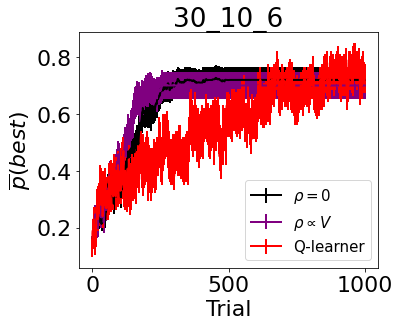

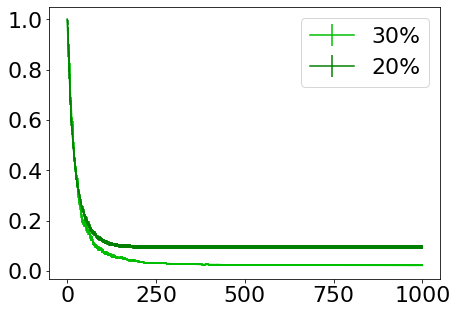

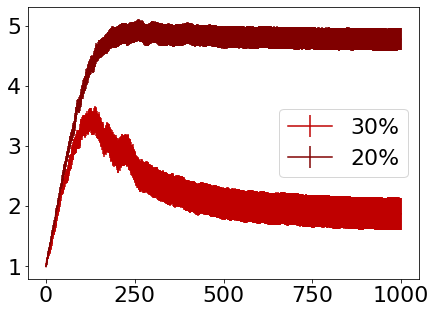

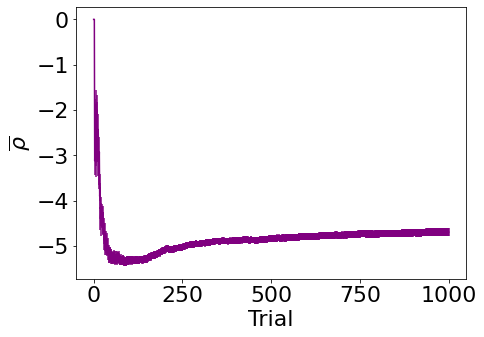

In [21]:
env = "30_10_6"
n_times = 1
save_L_zero = []
save_L_val = []
save_q = []
thresh = 0

for i in range(n_times):
    print("iter: %s" %i)
    rnd_seeds = np.random.randint(1,100000,n_states)     
    L_states_zero = learning.simulate(params,n_states,n_trials,v0=v0,crit=crit,env=env,mod="constant",k=k,norm=norm,    
        mag=mag,rnd_seeds=rnd_seeds,anneal=anneal,T=T,use_var=use_var,phi=phi,r_mag=r_mag,l_mag=l_mag)
    L_states_val = learning.simulate(params,n_states,n_trials,v0=v0,crit=crit,env=env,mod=mod,k=k,norm=norm,mag=mag,rnd_seeds=rnd_seeds,\
        anneal=anneal,T=T,use_var=use_var,phi=phi,r_mag=r_mag,l_mag=l_mag)
    Q_states = learn.simulate((0.19,48.75),n_states,n_trials,v0=v0,env=env,r_mag=1,l_mag=0, UCB=True, UCB_samplemean=True, gamma=.59)
    
    save_L_zero.append(L_states_zero)
    save_L_val.append(L_states_val)
    save_q.append(Q_states)

    # plot average sm'
    fig, axs = plt.subplots(figsize=(6, 5))
    plot_dynamics.avg_sm(L_states_zero,n_trials,n_states,0,axs,"black",print_auc=print_auc)
    plot_dynamics.avg_sm(L_states_val,n_trials,n_states,0,axs,"purple",print_auc=print_auc)
    plot_dynamics.avg_sm(Q_states,n_trials,n_states,0,axs,"red",print_auc=print_auc)
    plt.legend(("$\\rho=0$", "$\\rho \propto V$", "Q-learner"), fontsize = 15, markerscale = 50, loc = 'lower right')
    # plt.legend(("$\\rho=0$", "$\\rho \propto V$"), fontsize = 15, markerscale = 50, loc = 'lower right')
    plt.title(env)
    plt.xlabel("Trial")
    plt.ylabel("$\overline{p}(best)$")
    #   plt.ylim([.5,.8])
    plt.tight_layout()

    # plot dynamics
    plot_me = L_states_val
    print(plot_me[0].norm_type)

    # plot dynamics for val mod
    fig1, ax1 = plt.subplots(figsize=(7, 5)) # go
    fig2, ax2 = plt.subplots(figsize=(7, 5)) # no go 
    fig4, ax4 = plt.subplots(figsize=(7, 5)) # rho

    axs = [ax1,ax2]
    plot_dynamics.avg_qs(plot_me,n_trials,n_states,0,axs,.75)
    plot_dynamics.avg_qs(plot_me,n_trials,n_states,1,axs,.5)
    get_leg = env[0:2]
    ax1.legend([ax_labels_best[get_leg], ax_labels_worst[get_leg]])
    ax2.legend([ax_labels_best[get_leg], ax_labels_worst[get_leg]])
    plt.ylabel("$\overline{\\rho}$")
    plt.xlabel("Trial")
    plot_dynamics.avg_rho(plot_me,n_trials,n_states,ax4)

    # print("No mod choices")
    # print(R_states_zero[0].C)
    # print("mod choices")
    # print(R_states_val[0].C)

iter: 0
black AUC: 436.489
purple AUC: 486.161
red AUC: 611.555


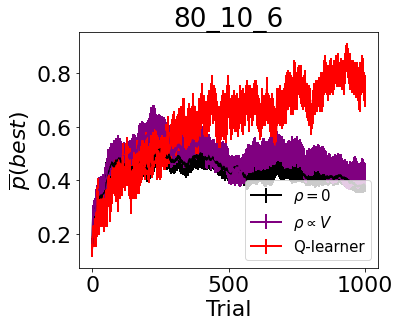

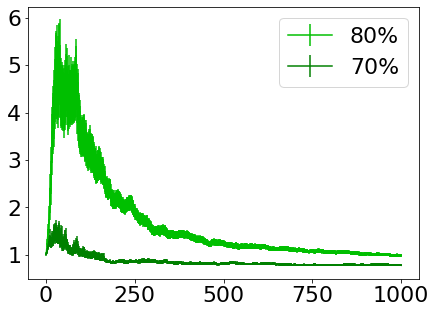

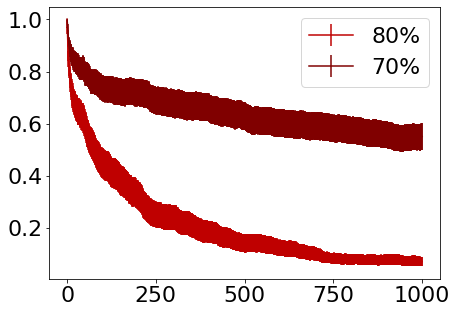

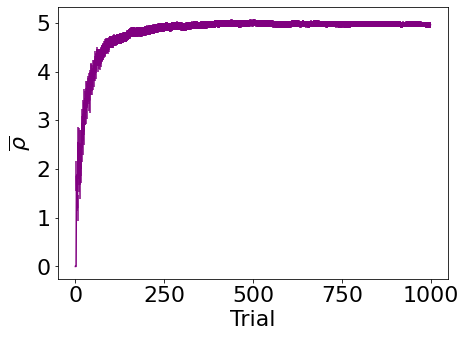

In [22]:
env = "80_10_6"
n_times = 1
save_L_zero = []
save_L_val = []
save_q = []
thresh = 0

for i in range(n_times):
    print("iter: %s" %i)
    rnd_seeds = np.random.randint(1,100000,n_states)     
    L_states_zero = learning.simulate(params,n_states,n_trials,v0=v0,crit=crit,env=env,mod="constant",k=k,norm=norm,mag=mag,rnd_seeds=rnd_seeds,anneal=anneal,T=T,use_var=use_var,phi=phi,r_mag=r_mag,l_mag=l_mag,hebb=norm)
    L_states_val = learning.simulate(params,n_states,n_trials,v0=v0,crit=crit,env=env,mod=mod,k=k,norm=norm,mag=mag,rnd_seeds=rnd_seeds,\
anneal=anneal,T=T,use_var=use_var,phi=phi,r_mag=r_mag,l_mag=l_mag,hebb=norm)
    Q_states = learn.simulate((0.19,48.75),n_states,n_trials,v0=v0,env=env,r_mag=1,l_mag=0,UCB=True, UCB_samplemean=True, gamma=.59)
    
    save_L_zero.append(L_states_zero)
    save_L_val.append(L_states_val)
    save_q.append(Q_states)

    # plot average sm'
    fig, axs = plt.subplots(figsize=(6, 5))
    plot_dynamics.avg_sm(L_states_zero,n_trials,n_states,0,axs,"black",print_auc=print_auc)
    plot_dynamics.avg_sm(L_states_val,n_trials,n_states,0,axs,"purple",print_auc=print_auc)
    plot_dynamics.avg_sm(Q_states,n_trials,n_states,0,axs,"red",print_auc=print_auc)
    plt.legend(("$\\rho=0$", "$\\rho \propto V$", "Q-learner"), fontsize = 15, markerscale = 50, loc = 'lower right')
    # plt.legend(("$\\rho=0$", "$\\rho \propto V$"), fontsize = 15, markerscale = 50, loc = 'lower right')
    plt.title(env)
    plt.xlabel("Trial")
    plt.ylabel("$\overline{p}(best)$")
    #   plt.ylim([.5,.8])
    plt.tight_layout()

    # plot dynamics
    plot_me = L_states_val

    # plot dynamics for val mod
    fig1, ax1 = plt.subplots(figsize=(7, 5)) # go
    fig2, ax2 = plt.subplots(figsize=(7, 5)) # no go 
    fig4, ax4 = plt.subplots(figsize=(7, 5)) # rho

    axs = [ax1,ax2]
    plot_dynamics.avg_qs(plot_me,n_trials,n_states,0,axs,.75)
    plot_dynamics.avg_qs(plot_me,n_trials,n_states,1,axs,.5)
    get_leg = env[0:2]
    ax1.legend([ax_labels_best[get_leg], ax_labels_worst[get_leg]])
    ax2.legend([ax_labels_best[get_leg], ax_labels_worst[get_leg]])
    plt.ylabel("$\overline{\\rho}$")
    plt.xlabel("Trial")
    plot_dynamics.avg_rho(plot_me,n_trials,n_states,ax4)

    # print("No mod choices")
    # print(R_states_zero[0].C)
    # print("mod choices")
    # print(R_states_val[0].C)

# script for determining appropriate T range

iter: 0
black AUC: 116.203
purple AUC: 133.526
iter: 0
black AUC: 121.481
purple AUC: 141.709
iter: 0
black AUC: 130.003
purple AUC: 149.274
iter: 0
black AUC: 134.425
purple AUC: 147.384
iter: 0
black AUC: 133.632
purple AUC: 141.785


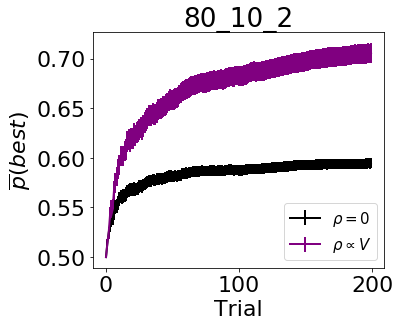

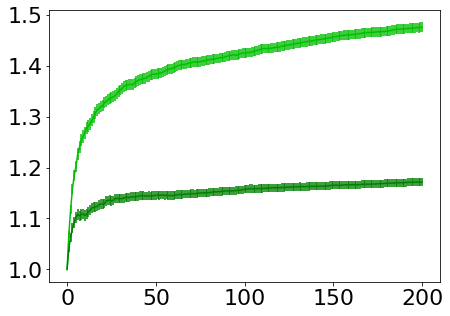

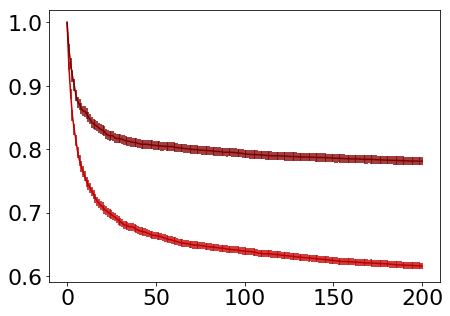

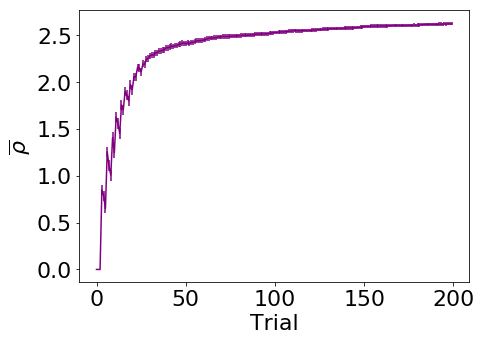

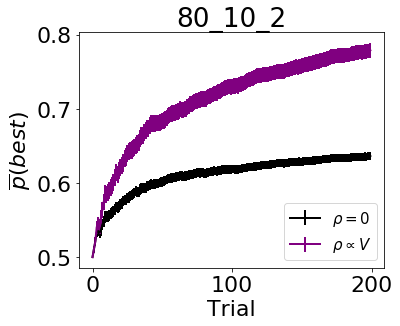

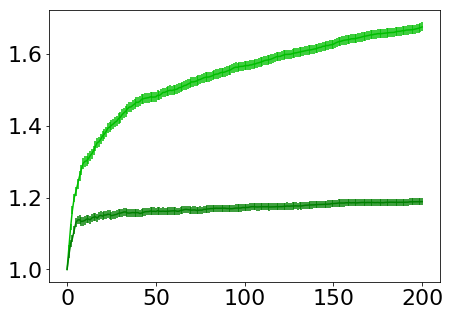

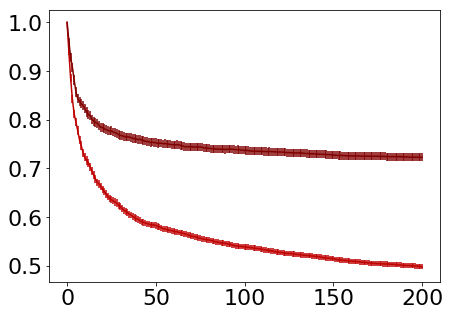

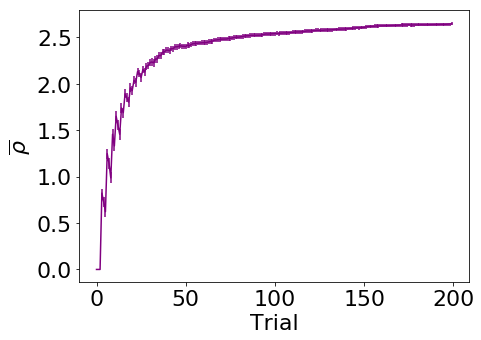

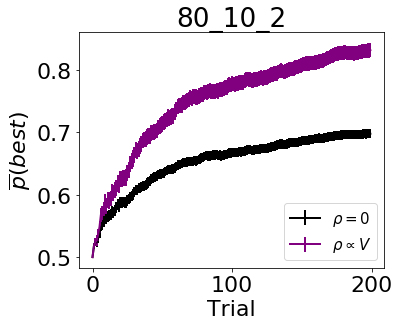

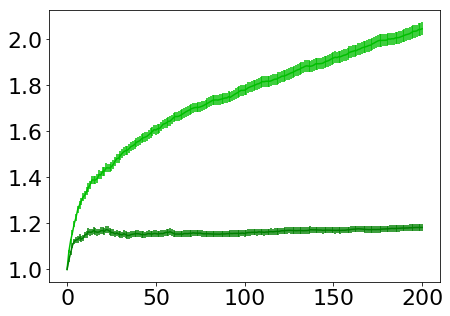

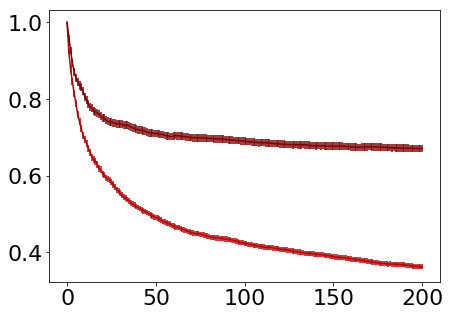

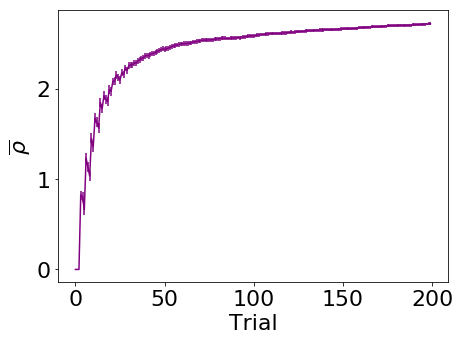

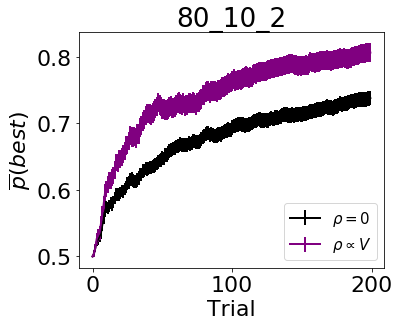

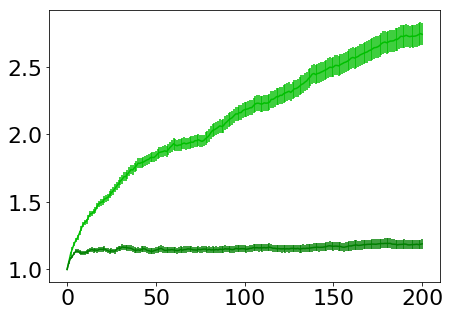

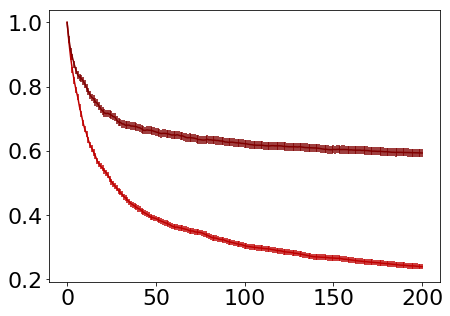

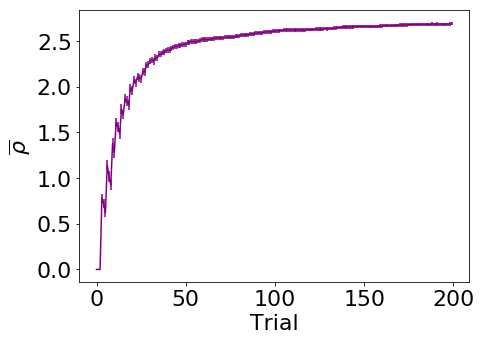

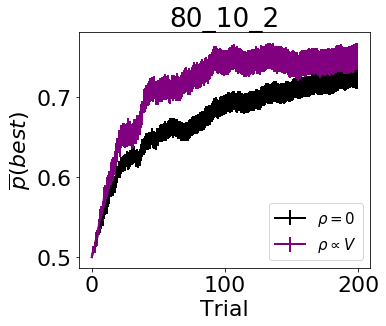

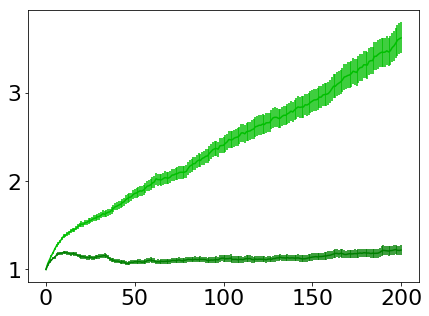

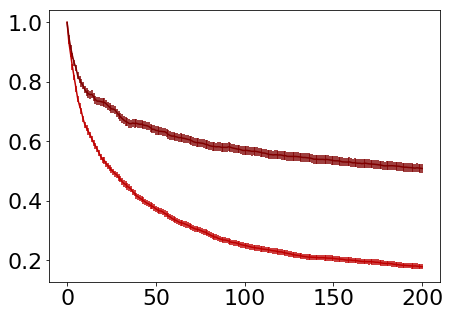

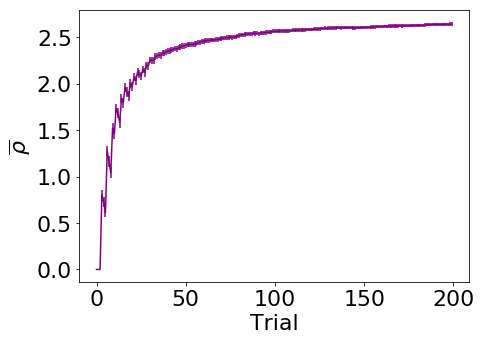

In [119]:
# script for determining appropriate T range
env = "80_10_2"
n_times = 1
save_L_zero = []
save_L_val = []
save_q = []
thresh = 0
Ts = np.array([5,10,20,50,100])
norm_type = None

alpha_c = 0.0  # not actually used with Bayes mod
alpha_a = .5 #0.8
beta =  1. #1.0
k = 10
params = (alpha_c,alpha_a, beta)


for i in range(n_times):
    for T in Ts:
        print("iter: %s" %i)
        rnd_seeds = np.random.randint(1,100000,n_states) 
        L_states_zero = learning.simulate(params,n_states,n_trials,v0=v0,crit=crit,env=env,mod="constant",k=k,norm=norm,mag=mag,rnd_seeds=rnd_seeds,anneal=anneal,T=T,use_std=use_std,exp_val=exp_val,phi=phi,r_mag=r_mag,l_mag=l_mag,norm_type=norm_type)
        L_states_val = learning.simulate(params,n_states,n_trials,v0=v0,crit=crit,env=env,mod=mod,k=k,norm=norm,mag=mag,rnd_seeds=rnd_seeds,\
anneal=anneal,T=T,use_std=use_std,exp_val=exp_val,phi=phi,r_mag=r_mag,l_mag=l_mag,norm_type=norm_type)
        # Q_states = learn.simulate((0.156,35.27506),n_states,n_trials,v0=v0,env=env,r_mag=1,l_mag=-1,rnd_seed = rnd_seed)
        
        save_L_zero.append(L_states_zero)
        save_L_val.append(L_states_val)
        # save_q.append(Q_states)

        # plot average sm'
        fig, axs = plt.subplots(figsize=(6, 5))
        plot_dynamics.avg_sm(L_states_zero,n_trials,n_states,0,axs,"black",print_auc=print_auc)
        plot_dynamics.avg_sm(L_states_val,n_trials,n_states,0,axs,"purple",print_auc=print_auc)
        # plot_dynamics.avg_sm(Q_states,n_trials,n_states,0,axs,"red",print_auc=print_auc)
        # plt.legend(("$\\rho=0$", "$\\rho \propto V$", "Q-learner"), fontsize = 15, markerscale = 50, loc = 'lower right')
        plt.legend(("$\\rho=0$", "$\\rho \propto V$"), fontsize = 15, markerscale = 50, loc = 'lower right')
        plt.title(env)
        plt.xlabel("Trial")
        plt.ylabel("$\overline{p}(best)$")
    #   plt.ylim([.5,.8])
        plt.tight_layout()

        # plot dynamics
        plot_me = L_states_val

        # plot dynamics for val mod
        fig1, ax1 = plt.subplots(figsize=(7, 5)) # go
        fig2, ax2 = plt.subplots(figsize=(7, 5)) # no go 
        fig4, ax4 = plt.subplots(figsize=(7, 5)) # rho

        axs = [ax1,ax2]
        plot_dynamics.avg_qs(plot_me,n_trials,n_states,0,axs,.75)
        plot_dynamics.avg_qs(plot_me,n_trials,n_states,1,axs,.5)
        # ax1.legend([ax_labels_best[env], ax_labels_worst[env]])
        # ax2.legend([ax_labels_best[env], ax_labels_worst[env]])
        plt.ylabel("$\overline{\\rho}$")
        plt.xlabel("Trial")
        plot_dynamics.avg_rho(plot_me,n_trials,n_states,ax4)

# Run those sims!

# Simulations subset


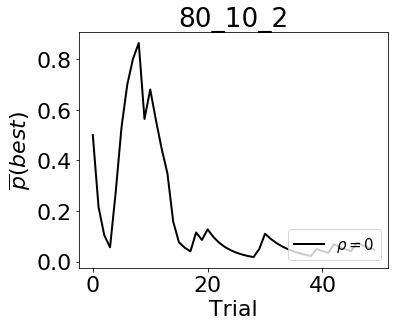

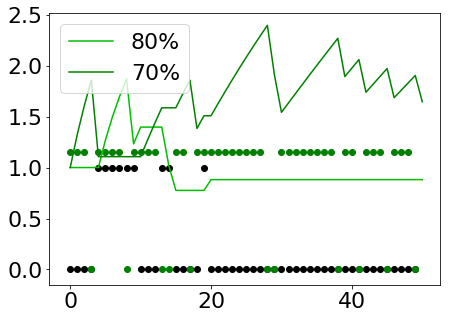

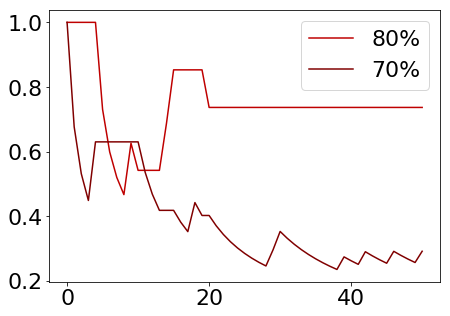

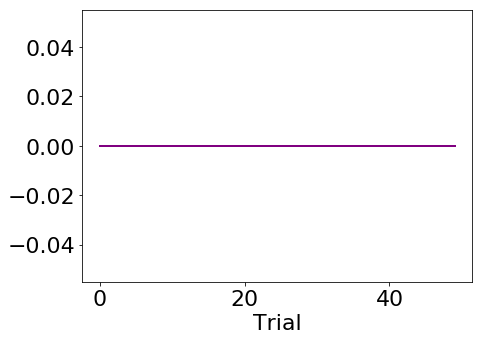

In [116]:
env = "80_10_2"
base = 2            # starting simulation
n_sims = 1          # total number of sims to average over
plt_n = 50         # ntrials to plot
for strt in (np.arange(n_sims) + base):    
    stp = strt + 1  # last simulation including
    plot_me = save_L_zero[2][strt:stp]
    # plot_me2 = save_L_val[4][strt:stp]
    # plot_me = L_states_val[strt:stp]

    # plot the choice
    # plot average sm'
    fig, axs = plt.subplots(figsize=(6, 5))
    plot_dynamics.avg_sm(plot_me,plt_n,1,0,axs,"black",print_auc=print_auc)
    # plot_dynamics.avg_sm(plot_me,plt_n,1,0,axs,"purple",print_auc=print_auc)
    # plot_dynamics.avg_sm(Q_states[str:stp],plt_n,n_sims,0,axs,"red",print_auc=print_auc)
    plt.legend(("$\\rho=0$", "$\\rho \propto V$", "Q-learner"), fontsize = 15, markerscale = 50, loc = 'lower right')
    plt.title(env)
    plt.xlabel("Trial")
    plt.ylabel("$\overline{p}(best)$")
    #   plt.ylim([.5,.8])
    plt.tight_layout()

    # plot dynamics for val mod
    fig1, ax1 = plt.subplots(figsize=(7, 5)) # go
    fig2, ax2 = plt.subplots(figsize=(7, 5)) # no go 
    fig4, ax4 = plt.subplots(figsize=(7, 5)) # rho

    axs = [ax1,ax2]
    plot_dynamics.avg_qs(plot_me,plt_n,1,0,axs,.75)
    plot_dynamics.avg_qs(plot_me,plt_n,1,1,axs,.5)
    ax1.legend([ax_labels_best[env], ax_labels_worst[env]])
    ax2.legend([ax_labels_best[env], ax_labels_worst[env]])
    plot_dynamics.plt_CR(plot_me,plt_n,axs[0])
    # plot_dynamics.plt_CR(plot_me,plt_n,axs[1])
    # plt.ylabel("$\overline{\\rho}$")
    plt.xlabel("Trial")
    plot_dynamics.avg_rho(plot_me,plt_n,1,ax4)

In [100]:
plot_me[0].V[33]

array([21.,  6.,  7.,  3.])

array([171.,  29.,   1.,   3.])

In [53]:
# pickle.dump([R_states_zero, R_states_val, Q_states], open("weirdcasefiles5000.p","wb"))

In [4]:
# R_states_zero, R_states_val, Q_states = pickle.load(open("weirdcasefiles5000.p","rb"))